In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version = 1)

In [39]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.base import clone
from sklearn.multiclass import OneVsOneClassifier

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
X, y = mnist["data"].values, mnist["target"].values

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [14]:
sgd_clf = SGDClassifier(random_state = 42)

In [15]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [17]:
some_digit = X_test[0]
sgd_clf.predict([some_digit])

array(['7'], dtype='<U1')

In [18]:
y_test[0]

'7'

In [19]:
some_digit_score = sgd_clf.decision_function([some_digit])
some_digit_score

array([[-27972.77566096, -52417.77039463, -14344.98217961,
         -1308.44575644, -19922.84531732,  -9208.91066356,
        -38331.13646795,   8007.54256279,  -4273.31795296,
         -5951.32911022]])

In [20]:
np.argmax(some_digit_score)

7

In [25]:
sgd_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

In [26]:
sgd_clf.classes_[7]

'7'

In [28]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state = 42))

In [29]:
ovo_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=SGDClassifier(random_state=42))

In [31]:
ovo_clf.predict([some_digit])

array(['7'], dtype=object)

In [32]:
forest_clf = RandomForestClassifier(random_state = 42)

In [33]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
forest_clf.predict([some_digit])

array(['7'], dtype=object)

In [35]:
forest_clf.predict_proba([some_digit])

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [38]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [40]:
std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train)

In [41]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv= 3,scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [43]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv = 3)

In [44]:
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

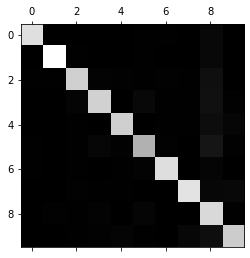

In [45]:
plt.matshow(conf_mx, cmap = plt.cm.gray)
plt.show()

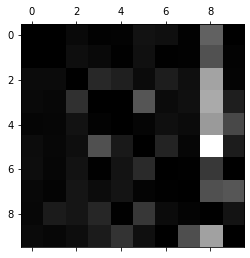

In [51]:
row_sum = conf_mx.sum(axis= 1, keepdims = True)
norm_conf = conf_mx / row_sum
np.fill_diagonal(norm_conf , 0)
plt.matshow(norm_conf, cmap = plt.cm.gray)
plt.show()